In [1]:
import numpy as np #for mathmatical expressions
import pandas as pd # for data manipulation 
import seaborn as sns #making statistical graphics.
import matplotlib.pyplot as plt
import os

In [2]:
import os #no of files in a path
path=r"C:\Users\Aamash\Desktop\Data Analysis Projects\Online Store Data Analysis By AamashKhan"
os.listdir(path)

['.ipynb_checkpoints',
 'Sales-April.csv',
 'Sales-Februrary.csv',
 'Sales-January.csv',
 'Sales-March.csv',
 'Sales-May.csv',
 'Untitled.ipynb']

In [9]:
#putting all the csv files data in to a single file
files=[file for file in os.listdir(path) if not file.startswith('.')]
alldata=pd.DataFrame()
for file in files:
    rawdata=pd.read_csv(path+"/"+file, encoding='latin1')
    alldata=pd.concat([alldata,rawdata],ignore_index=True,axis=0)
alldata.to_csv("aldata.csv",index=False)

In [10]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales Representative  3888 non-null   object 
 1   Location              3888 non-null   object 
 2   Region                3888 non-null   object 
 3   Customer              3888 non-null   object 
 4   Order Date            3888 non-null   object 
 5   Item                  3888 non-null   object 
 6   Quantity              3888 non-null   int64  
 7   Price                 3888 non-null   float64
 8   Total Sale Amount     3888 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 273.5+ KB


In [11]:
alldata['Price']=pd.to_numeric(alldata['Price'])
alldata['Total Sale Amount']=pd.to_numeric(alldata['Total Sale Amount'])


In [14]:
#Converting this to date format with df['DOB'] = pd. to_datetime(df['DOB']) , the date gets converted to: 2016-01-26 and its dtype is: DOB datetime64[ns] .
alldata['Order Date']=pd.to_datetime(alldata['Order Date'])#convert the object typre date to string type
alldata['Order Date'].dtype
type(alldata['Order Date'])

pandas.core.series.Series

In [15]:
alldata['day']=(alldata['Order Date']).dt.day#dt.day telss the day of that datetime similiraly dt,year dt.min etc
alldata['month']=(alldata['Order Date']).dt.month
alldata['year']=(alldata['Order Date']).dt.year
alldata['minute']=(alldata['Order Date']).dt.minute
alldata['hour']=(alldata['Order Date']).dt.hour

In [16]:
#The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
alldata.describe()


,Quantity,Price,Total Sale Amount,day,month,year,minute,hour
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.0,3888.0,3888.0
mean,5.566358,22.880005,127.617577,15.584362,3.051955,2016.0,0.0,0.0
std,2.852649,15.997386,120.360891,8.324094,1.382710,0.0,0.0,0.0
min,1.000000,12.420000,12.420000,1.000000,1.000000,2016.0,0.0,0.0
25%,3.000000,12.420000,53.350000,8.000000,2.000000,2016.0,0.0,0.0
50%,6.000000,16.320000,97.920000,16.000000,3.000000,2016.0,0.0,0.0
75%,8.000000,17.830000,142.640000,23.000000,4.000000,2016.0,0.0,0.0
max,10.000000,53.350000,533.500000,31.000000,5.000000,2016.0,0.0,0.0


In [17]:
alldata.head(500)

,Sales Representative,Location,Region,Customer,Order Date,Item,Quantity,Price,Total Sale Amount,day,month,year,minute,hour
0,Patrick Graham,Washington,West,Jeremy Baker,2016-04-01,Junk,8,12.42,99.36,1,4,2016,0,0
1,Frances Warren,New Jersey,East,Albert Dunn,2016-04-01,Widgets,9,53.35,480.15,1,4,2016,0,0
2,Sara Snyder,New York,East,Robert Hayes,2016-04-01,Junk,4,12.42,49.68,1,4,2016,0,0
3,Randy Watson,New York,East,Cheryl Riley,2016-04-01,Widgets,5,53.35,266.75,1,4,2016,0,0
4,Randy Watson,New Jersey,East,Kimberly Coleman,2016-04-01,Widgets,2,53.35,106.70,1,4,2016,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Patrick Graham,Washington,West,Karen Willis,2016-02-07,Junk,9,12.42,111.78,7,2,2016,0,0
496,Frances Warren,New Jersey,East,Russell Day,2016-02-07,Stuff,6,16.32,97.92,7,2,2016,0,0
497,Sara Snyder,Massachusetts,East,Susan Watkins,2016-02-07,Widgets,7,53.35,373.45,7,2,2016,0,0
498,Patrick Graham,Washington,West,Craig Reyes,2016-02-07,Junk,9,12.42,111.78,7,2,2016,0,0


In [19]:
#deleting null data 
ndf=alldata[alldata.isna().any(axis=1)]#axis=1 means column wise operation means it will chack mull value col by col
display(ndf.head())
#the output shows that there is no null value

,Sales Representative,Location,Region,Customer,Order Date,Item,Quantity,Price,Total Sale Amount,day,month,year,minute,hour


In [20]:
alldata=alldata.dropna(how='all')
# dropna() will look for rows with missing values. If it finds a row with a missing value, it will drop the entire row.



In [21]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 3887
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sales Representative  3888 non-null   object        
 1   Location              3888 non-null   object        
 2   Region                3888 non-null   object        
 3   Customer              3888 non-null   object        
 4   Order Date            3888 non-null   datetime64[ns]
 5   Item                  3888 non-null   object        
 6   Quantity              3888 non-null   int64         
 7   Price                 3888 non-null   float64       
 8   Total Sale Amount     3888 non-null   float64       
 9   day                   3888 non-null   int64         
 10  month                 3888 non-null   int64         
 11  year                  3888 non-null   int64         
 12  minute                3888 non-null   int64         
 13  hour              

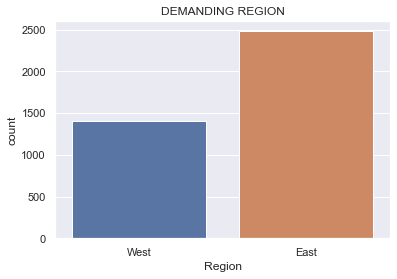

In [22]:
#We are checking in which region the sales are most 
sns.set(style="darkgrid")#countplot is used when we have to see thre performance of specific area in the form of plot that which one is better
REGION=sns.countplot(x="Region",data=alldata).set_title("DEMANDING REGION")

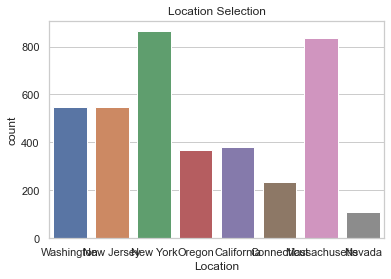

In [23]:
#In this we are checking in which location the response is good this helps mostly when we havwe to open any new branch
sns.set(style="whitegrid")
REGION=sns.countplot(x="Location",data=alldata).set_title("Location Selection")

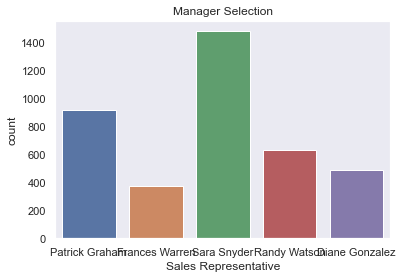

In [25]:
#Checking the top sales representatives for manager selection of new branch
sns.set(style="dark")
REGION=sns.countplot(x="Sales Representative",data=alldata).set_title("Manager Selection")

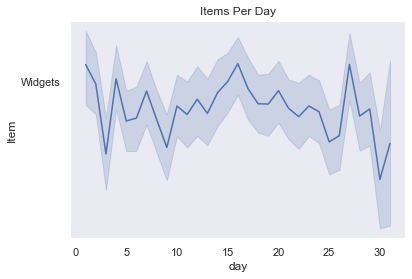

In [26]:
#sale of items on the basis of days
gendercount=sns.lineplot(x="day",y="Item",data=alldata).set_title("Items Per Day")

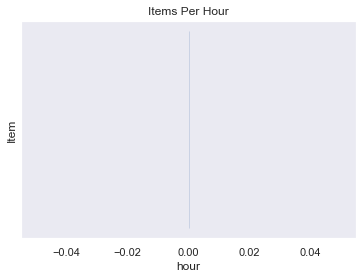

In [27]:
#sale of items on the basis of hour
gendercount=sns.lineplot(x="hour",y="Item",data=alldata).set_title("Items Per Hour")

Text(0.5, 1.0, 'Most Demanded Item')

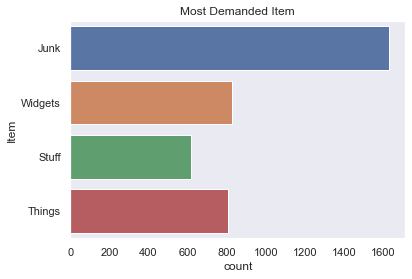

In [28]:
#Item which has the most selling
sns.countplot(y="Item",data=alldata).set_title("Most Demanded Item")


Text(0.5, 1.0, 'Item Price')

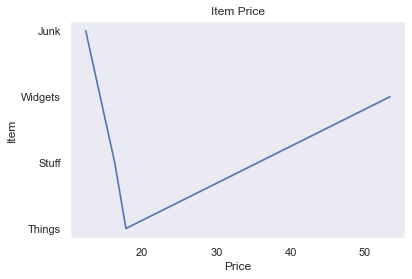

In [30]:
#Line graphs are used to track changes over short and long periods of time. When smaller changes exist, line graphs are better to use than bar graphs. 
#To check price of Items
sns.lineplot(y="Item",x="Price",data=alldata).set_title("Item Price")

<AxesSubplot:xlabel='Customer', ylabel='Total Sale Amount'>

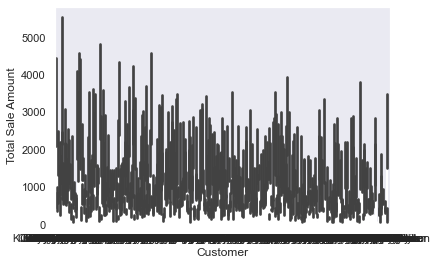

In [32]:
#. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.
#checking the total sale amount that cusdtomers mostly shop as the salesamount is increasing bar chaert is dimming
sns.barplot(x="Customer",y="Total Sale Amount",estimator=sum,data=alldata)